# Lab 6  - Joseph Hinh Duong 1002117124

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [2]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, len(self.cards) - 20)  # Random placement
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards) == self.plastic_card_position:
            self.shuffle()
            self.cards = self._generate_deck()
            self.plastic_card_position = random.randint(30, len(self.cards) - 20)
        return self.cards.pop() if self.cards else None
    
    def __repr__(self):
        return f"Deck({len(self.cards)} cards remaining)"

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [3]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        pass  # Return a string stating the card's suit and rank.

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_position = 0
    
    def _generate_deck(self):
        pass  # Add one of each card to the deck.
    
    def shuffle(self):
        pass  
    
    def draw_card(self):
        pass  
    
    def __repr__(self):
        pass  # Return a string representation of the deck.

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        pass  
    
    def get_value(self):
        pass  # Calculate the value of the hand.
    
    def is_blackjack(self):
        pass  # Check if the hand is a blackjack.
    
    def is_bust(self):
        pass  # Check if the hand is a bust.

class Player:
    def __init__(self, name, chips):
        self.name = name
        self.chips = chips
        self.hands = []
        self.strategy = None
    
    def place_bet(self, amount):
        pass S
    
    def hit(self, deck):
        pass  # Draws a card.
    
    def stand(self):
        pass  # Ends a turn.
    
    def split(self):
        pass  # Splits hand in two.
    
    def double_down(self, deck):
        pass  # Doubles the bet and takes one more card.
    
    def receive_winnings(self, amount):
        pass  # Adds winnings to current chip count.

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=float('inf'))
        self.deck = None
    
    def play_turn(self, deck):
        pass  # Implement dealer's strategy.

class BlackjackGame:
    def __init__(self, num_players):
        self.players = []
        self.dealer = Dealer()
        self.deck = Deck()
        self.rounds_played = 0
    
    def start_game(self):
        pass  # Start a new game.
    
    def deal_cards(self):
        pass  # Deal initial cards to players and dealer.
    
    def play_round(self):
        pass  
    
    def evaluate_winners(self):
        pass  # Determines the winners and distributes chips.
    
    def track_statistics(self):
        pass  # Collects and stores game outcomes for analysis.

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [4]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, len(self.cards) - 20)
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards) == self.plastic_card_position:
            self.shuffle()
            self.cards = self._generate_deck()
            self.plastic_card_position = random.randint(30, len(self.cards) - 20)
        return self.cards.pop() if self.cards else None
    
    def __repr__(self):
        return f"Deck({len(self.cards)} cards remaining)"

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        self.cards.append(card)
    
    def get_value(self):
        value = 0
        aces = 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value
    
    def is_blackjack(self):
        return len(self.cards) == 2 and self.get_value() == 21
    
    def is_bust(self):
        return self.get_value() > 21

class Player:
    def __init__(self, name, chips):
        self.name = name
        self.chips = chips
        self.hands = [Hand()]
    
    def place_bet(self, amount):
        if amount > self.chips:
            raise ValueError("Not enough chips")
        self.chips -= amount
    
    def hit(self, deck):
        self.hands[0].add_card(deck.draw_card())
    
    def stand(self):
        pass  
    
    def receive_winnings(self, amount):
        self.chips += amount
    
    def __repr__(self):
        return f"{self.name} - Chips: {self.chips}"

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=float('inf'))
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            self.hit(deck)

class BlackjackGame:
    def __init__(self, num_players):
        self.players = [Player(f"Player {i+1}", 1000) for i in range(num_players)]
        self.dealer = Dealer()
        self.deck = Deck()
        self.rounds_played = 0
    
    def start_game(self):
        self.rounds_played = 0
    
    def deal_cards(self):
        for player in self.players:
            player.hands[0] = Hand()
            player.hands[0].add_card(self.deck.draw_card())
            player.hands[0].add_card(self.deck.draw_card())
        self.dealer.hands[0] = Hand()
        self.dealer.hands[0].add_card(self.deck.draw_card())
        self.dealer.hands[0].add_card(self.deck.draw_card())
    
    def play_round(self):
        for player in self.players:
            while player.hands[0].get_value() < 17:
                player.hit(self.deck)
        self.dealer.play_turn(self.deck)
    
    def evaluate_winners(self):
        dealer_value = self.dealer.hands[0].get_value()
        for player in self.players:
            player_value = player.hands[0].get_value()
            if player_value > 21:
                continue
            elif dealer_value > 21 or player_value > dealer_value:
                player.receive_winnings(200)
    
    def track_statistics(self):
        pass

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [5]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, len(self.cards) - 20)
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards) == self.plastic_card_position:
            self.shuffle()
            self.cards = self._generate_deck()
            self.plastic_card_position = random.randint(30, len(self.cards) - 20)
        return self.cards.pop() if self.cards else None
    
    def __repr__(self):
        return f"Deck({len(self.cards)} cards remaining)"

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        self.cards.append(card)
    
    def get_value(self):
        value = 0
        aces = 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value
    
    def is_blackjack(self):
        return len(self.cards) == 2 and self.get_value() == 21
    
    def is_bust(self):
        return self.get_value() > 21

class Player:
    def __init__(self, name, chips):
        self.name = name
        self.chips = chips
        self.hands = [Hand()]
    
    def place_bet(self, amount):
        if amount > self.chips:
            raise ValueError("Not enough chips")
        self.chips -= amount
    
    def hit(self, deck):
        self.hands[0].add_card(deck.draw_card())
    
    def stand(self):
        pass  # Player chooses to end their turn
    
    def receive_winnings(self, amount):
        self.chips += amount
    
    def __repr__(self):
        return f"{self.name} - Chips: {self.chips}"

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=float('inf'))
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            self.hit(deck)

class BlackjackGame:
    def __init__(self, num_players):
        self.players = [Player(f"Player {i+1}", 1000) for i in range(num_players)]
        self.dealer = Dealer()
        self.deck = Deck()
        self.rounds_played = 0
    
    def start_game(self):
        self.rounds_played = 0
        print("Starting Blackjack Game...")
    
    def deal_cards(self):
        print("Dealing cards...")
        for player in self.players:
            player.hands[0] = Hand()
            player.hands[0].add_card(self.deck.draw_card())
            player.hands[0].add_card(self.deck.draw_card())
        self.dealer.hands[0] = Hand()
        self.dealer.hands[0].add_card(self.deck.draw_card())
        self.dealer.hands[0].add_card(self.deck.draw_card())
    
    def play_round(self):
        print("Playing round...")
        for player in self.players:
            while player.hands[0].get_value() < 17:
                player.hit(self.deck)
                print(f"{player.name} hits: {player.hands[0].cards} ({player.hands[0].get_value()})")
        self.dealer.play_turn(self.deck)
        print(f"Dealer's hand: {self.dealer.hands[0].cards} ({self.dealer.hands[0].get_value()})")
    
    def evaluate_winners(self):
        dealer_value = self.dealer.hands[0].get_value()
        print("Evaluating winners...")
        for player in self.players:
            player_value = player.hands[0].get_value()
            if player_value > 21:
                print(f"{player.name} busts!")
                continue
            elif dealer_value > 21 or player_value > dealer_value:
                player.receive_winnings(200)
                print(f"{player.name} wins!")
            else:
                print(f"{player.name} loses!")
    
    def track_statistics(self):
        pass

# Demonstrate gameplay
game = BlackjackGame(num_players=2)
game.start_game()
for _ in range(3):  # Play 3 rounds
    game.deal_cards()
    game.play_round()
    game.evaluate_winners()
    print("End of Round.\n")

Starting Blackjack Game...
Dealing cards...
Playing round...
Player 2 hits: [8 of Hearts, 5 of Clubs, 8 of Spades] (21)
Dealer's hand: [7 of Diamonds, 5 of Hearts, 8 of Clubs] (20)
Evaluating winners...
Player 1 loses!
Player 2 wins!
End of Round.

Dealing cards...
Playing round...
Dealer's hand: [9 of Spades, 7 of Hearts, Q of Spades] (26)
Evaluating winners...
Player 1 wins!
Player 2 wins!
End of Round.

Dealing cards...
Playing round...
Dealer's hand: [7 of Hearts, 9 of Hearts, 9 of Diamonds] (25)
Evaluating winners...
Player 1 wins!
Player 2 wins!
End of Round.



6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [8]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, len(self.cards) - 20)
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards) == self.plastic_card_position:
            self.shuffle()
            self.cards = self._generate_deck()
            self.plastic_card_position = random.randint(30, len(self.cards) - 20)
        return self.cards.pop() if self.cards else None
    
    def __repr__(self):
        return f"Deck({len(self.cards)} cards remaining)"

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        self.cards.append(card)
    
    def get_value(self):
        value = 0
        aces = 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value
    
    def is_blackjack(self):
        return len(self.cards) == 2 and self.get_value() == 21
    
    def is_bust(self):
        return self.get_value() > 21

class Player:
    def __init__(self, name, chips):
        self.name = name
        self.chips = chips
        self.hands = [Hand()]
    
    def place_bet(self, amount):
        if amount > self.chips:
            raise ValueError("Not enough chips")
        self.chips -= amount
    
    def hit(self, deck):
        self.hands[0].add_card(deck.draw_card())
    
    def stand(self):
        pass  # Player chooses to end their turn
    
    def receive_winnings(self, amount):
        self.chips += amount
    
    def __repr__(self):
        return f"{self.name} - Chips: {self.chips}"

class CountingPlayer(Player):
    def __init__(self, name, chips, threshold=-2):
        super().__init__(name, chips)
        self.count = 0
        self.threshold = threshold
    
    def update_count(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.count -= 1
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17 or self.count < self.threshold:
            card = deck.draw_card()
            self.update_count(card)
            self.hands[0].add_card(card)

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=float('inf'))
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            self.hit(deck)

class BlackjackGame:
    def __init__(self, num_players):
        self.players = [CountingPlayer(f"Player {i+1}", 1000) for i in range(num_players)]
        self.dealer = Dealer()
        self.deck = Deck()
        self.rounds_played = 0
    
    def start_game(self):
        self.rounds_played = 0
        print("Starting Blackjack Game...")
    
    def deal_cards(self):
        print("Dealing cards...")
        for player in self.players:
            player.hands[0] = Hand()
            for _ in range(2):
                card = self.deck.draw_card()
                player.update_count(card)
                player.hands[0].add_card(card)
        self.dealer.hands[0] = Hand()
        for _ in range(2):
            self.dealer.hands[0].add_card(self.deck.draw_card())
    
    def play_round(self):
        print("Playing round...")
        for player in self.players:
            player.play_turn(self.deck)
            print(f"{player.name} plays: {player.hands[0].cards} ({player.hands[0].get_value()})")
        self.dealer.play_turn(self.deck)
        print(f"Dealer's hand: {self.dealer.hands[0].cards} ({self.dealer.hands[0].get_value()})")
    
    def evaluate_winners(self):
        dealer_value = self.dealer.hands[0].get_value()
        print("Evaluating winners...")
        for player in self.players:
            player_value = player.hands[0].get_value()
            if player_value > 21:
                print(f"{player.name} busts!")
                continue
            elif dealer_value > 21 or player_value > dealer_value:
                player.receive_winnings(200)
                print(f"{player.name} wins!")
            else:
                print(f"{player.name} loses!")
    
    def track_statistics(self):
        pass

# Test out code.
game = BlackjackGame(num_players=2)
game.start_game()
for _ in range(3):  # Plays three rounds of Blackjack.
    game.deal_cards()
    game.play_round()
    game.evaluate_winners()
    print("End of Round.\n")

Starting Blackjack Game...
Dealing cards...
Playing round...
Player 1 plays: [Q of Hearts, A of Spades] (21)
Player 2 plays: [10 of Diamonds, K of Clubs] (20)
Dealer's hand: [9 of Diamonds, 10 of Hearts] (19)
Evaluating winners...
Player 1 wins!
Player 2 wins!
End of Round.

Dealing cards...
Playing round...
Player 1 plays: [6 of Spades, 7 of Clubs, 3 of Spades, 8 of Clubs] (24)
Player 2 plays: [8 of Spades, 3 of Spades, 7 of Diamonds] (18)
Dealer's hand: [10 of Hearts, 9 of Diamonds] (19)
Evaluating winners...
Player 1 busts!
Player 2 loses!
End of Round.

Dealing cards...
Playing round...
Player 1 plays: [7 of Diamonds, 9 of Spades, 2 of Clubs] (18)
Player 2 plays: [Q of Hearts, 8 of Diamonds] (18)
Dealer's hand: [2 of Hearts, 7 of Spades, 6 of Clubs, 7 of Clubs] (22)
Evaluating winners...
Player 1 wins!
Player 2 wins!
End of Round.



7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [11]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, len(self.cards) - 20)
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards) == self.plastic_card_position:
            self.shuffle()
            self.cards = self._generate_deck()
            self.plastic_card_position = random.randint(30, len(self.cards) - 20)
        return self.cards.pop() if self.cards else None

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        self.cards.append(card)
    
    def get_value(self):
        value = 0
        aces = 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips):
        self.name = name
        self.chips = chips
        self.hands = [Hand()]
    
    def place_bet(self, amount):
        if amount > self.chips:
            raise ValueError("Not enough chips")
        self.chips -= amount
    
    def hit(self, deck):
        self.hands[0].add_card(deck.draw_card())

    def stand(self):
        pass

    def receive_winnings(self, amount):
        self.chips += amount
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            self.hit(deck)

class CountingPlayer(Player):
    def __init__(self, name, chips, threshold=-2):
        super().__init__(name, chips)
        self.count = 0
        self.threshold = threshold
    
    def update_count(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.count -= 1
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17 or self.count < self.threshold:
            card = deck.draw_card()
            self.update_count(card)
            self.hands[0].add_card(card)

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=float('inf'))
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            self.hit(deck)

class BlackjackGame:
    def __init__(self):
        self.players = [CountingPlayer("Strategy Player", 1000)] + [Player(f"Player {i}", 1000) for i in range(1, 4)]
        self.dealer = Dealer()
        self.deck = Deck()
    
    def play_game(self, max_rounds=50):
        rounds = 0
        while rounds < max_rounds and self.players[0].chips > 0:
            self.deal_cards()
            self.play_round()
            self.evaluate_winners()
            rounds += 1
        print(f"Strategy Player's final chips: {self.players[0].chips}")
    
    def deal_cards(self):
        for player in self.players:
            player.hands[0] = Hand()
            for _ in range(2):
                card = self.deck.draw_card()
                if isinstance(player, CountingPlayer):
                    player.update_count(card)
                player.hands[0].add_card(card)
        self.dealer.hands[0] = Hand()
        for _ in range(2):
            self.dealer.hands[0].add_card(self.deck.draw_card())
    
    def play_round(self):
        for player in self.players:
            player.play_turn(self.deck)
        self.dealer.play_turn(self.deck)
    
    def evaluate_winners(self):
        dealer_value = self.dealer.hands[0].get_value()
        for player in self.players:
            player_value = player.hands[0].get_value()
            if player_value > 21:
                continue
            elif dealer_value > 21 or player_value > dealer_value:
                player.receive_winnings(200)

# Rest out code.
game = BlackjackGame()
game.play_game()

Strategy Player's final chips: 2200


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


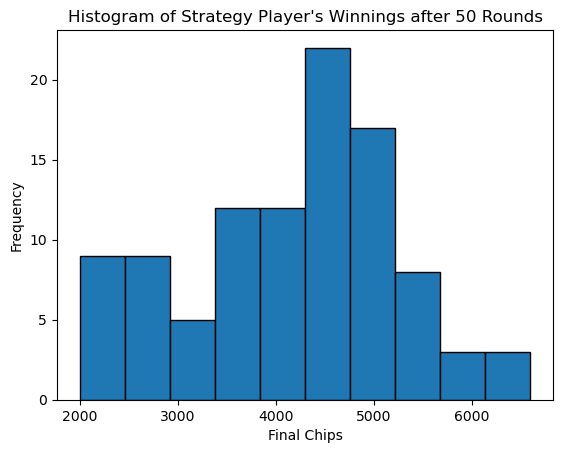

Average winnings: 4164.0
Standard deviation: 1094.1224794327188
Probability of net winning: 1.0
Probability of net loss: 0.0


In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if not self.cards:
            self.shuffle()
            self.cards = self._generate_deck()
        return self.cards.pop() if self.cards else None

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        if card:
            self.cards.append(card)
    
    def get_value(self):
        value = sum(10 if card.rank in 'JQK' else 11 if card.rank == 'A' else int(card.rank) for card in self.cards)
        aces = sum(1 for card in self.cards if card.rank == 'A')
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips):
        self.name = name
        self.chips = chips
        self.hands = [Hand()]
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            card = deck.draw_card()
            if not card:
                break
            self.hands[0].add_card(card)

    def receive_winnings(self, amount):
        self.chips += amount

class CountingPlayer(Player):
    def __init__(self, name, chips, threshold=-2):
        super().__init__(name, chips)
        self.count = 0
        self.threshold = threshold
    
    def update_count(self, card):
        if card:
            if card.rank in ['2', '3', '4', '5', '6']:
                self.count += 1
            elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
                self.count -= 1
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17 or self.count < self.threshold:
            card = deck.draw_card()
            if not card:
                break
            self.update_count(card)
            self.hands[0].add_card(card)
            if self.hands[0].get_value() >= 21:
                break

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=float('inf'))
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            card = deck.draw_card()
            if not card:
                break
            self.hands[0].add_card(card)

class BlackjackGame:
    def __init__(self):
        self.players = [CountingPlayer("Strategy Player", 1000)] + [Player(f"Player {i}", 1000) for i in range(1, 4)]
        self.dealer = Dealer()
        self.deck = Deck()
    
    def play_game(self, max_rounds=50):
        rounds = 0
        while rounds < max_rounds and self.players[0].chips > 0:
            self.deal_cards()
            self.play_round()
            self.evaluate_winners()
            rounds += 1
        return self.players[0].chips
    
    def deal_cards(self):
        self.deck.shuffle()
        for player in self.players:
            player.hands[0] = Hand()
            for _ in range(2):
                card = self.deck.draw_card()
                if card:
                    if isinstance(player, CountingPlayer):
                        player.update_count(card)
                    player.hands[0].add_card(card)
        self.dealer.hands[0] = Hand()
        for _ in range(2):
            self.dealer.hands[0].add_card(self.deck.draw_card())
    
    def play_round(self):
        for player in self.players:
            player.play_turn(self.deck)
        self.dealer.play_turn(self.deck)
    
    def evaluate_winners(self):
        dealer_value = self.dealer.hands[0].get_value()
        for player in self.players:
            player_value = player.hands[0].get_value()
            if player_value > 21:
                continue
            elif dealer_value > 21 or player_value > dealer_value:
                player.receive_winnings(200)

# Run 100 games and record strategy player's winnings
winnings = []
num_games = 100

for _ in range(num_games):
    game = BlackjackGame()
    winnings.append(game.play_game())

# Compute statistics
average_winnings = np.mean(winnings)
std_dev_winnings = np.std(winnings)
prob_win = sum(1 for w in winnings if w > 1000) / num_games
prob_loss = sum(1 for w in winnings if w < 1000) / num_games

# Display histogram
plt.hist(winnings, bins=10, edgecolor='black')
plt.xlabel("Final Chips")
plt.ylabel("Frequency")
plt.title("Histogram of Strategy Player's Winnings after 50 Rounds")
plt.show()

# Print results
print(f"Average winnings: {average_winnings}")
print(f"Standard deviation: {std_dev_winnings}")
print(f"Probability of net winning: {prob_win}")
print(f"Probability of net loss: {prob_loss}")

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

Threshold -5: Average Winnings = 4638.0, Std Dev = 885.2999491697715
Threshold -3: Average Winnings = 4446.0, Std Dev = 974.0041067675228
Threshold -2: Average Winnings = 4104.0, Std Dev = 985.2837154850373
Threshold 0: Average Winnings = 3796.0, Std Dev = 1019.0112855115982
Threshold 2: Average Winnings = 3634.0, Std Dev = 922.1952071009695


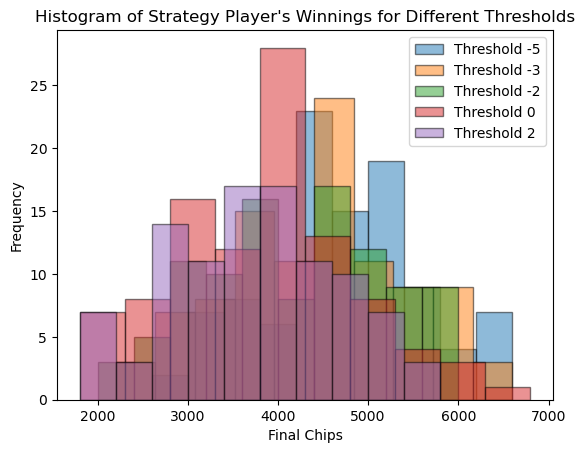

In [11]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.reset_deck()
    
    def reset_deck(self):
        self.cards = [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
        self.shuffle()
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if not self.cards:
            self.reset_deck()
        return self.cards.pop() if self.cards else None

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        if card:
            self.cards.append(card)
    
    def get_value(self):
        value = sum(10 if card.rank in 'JQK' else 11 if card.rank == 'A' else int(card.rank) for card in self.cards)
        aces = sum(1 for card in self.cards if card.rank == 'A')
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips):
        self.name = name
        self.chips = chips
        self.hands = [Hand()]
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            card = deck.draw_card()
            if not card:
                break
            self.hands[0].add_card(card)
    
    def receive_winnings(self, amount):
        self.chips += amount

class CountingPlayer(Player):
    def __init__(self, name, chips, threshold=-2):
        super().__init__(name, chips)
        self.count = 0
        self.threshold = threshold
    
    def update_count(self, card):
        if card:
            if card.rank in ['2', '3', '4', '5', '6']:
                self.count += 1
            elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
                self.count -= 1
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17 or (self.count < self.threshold and self.hands[0].get_value() < 21):
            if not deck.cards:
                break
            card = deck.draw_card()
            if not card:
                break
            self.update_count(card)
            self.hands[0].add_card(card)
            if self.hands[0].get_value() >= 21:
                break

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=float('inf'))
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            if not deck.cards:
                break
            card = deck.draw_card()
            if not card:
                break
            self.hands[0].add_card(card)

class BlackjackGame:
    def __init__(self, threshold=-2):
        self.players = [CountingPlayer("Strategy Player", 1000, threshold)] + [Player(f"Player {i}", 1000) for i in range(1, 4)]
        self.dealer = Dealer()
        self.deck = Deck()
    
    def play_game(self, max_rounds=50):
        rounds = 0
        while rounds < max_rounds and self.players[0].chips > 0:
            self.deal_cards()
            self.play_round()
            self.evaluate_winners()
            rounds += 1
        return self.players[0].chips
    
    def deal_cards(self):
        self.deck.shuffle()
        for player in self.players:
            player.hands[0] = Hand()
            for _ in range(2):
                if not self.deck.cards:
                    break
                card = self.deck.draw_card()
                if card:
                    if isinstance(player, CountingPlayer):
                        player.update_count(card)
                    player.hands[0].add_card(card)
        self.dealer.hands[0] = Hand()
        for _ in range(2):
            if not self.deck.cards:
                break
            self.dealer.hands[0].add_card(self.deck.draw_card())
    
    def play_round(self):
        for player in self.players:
            player.play_turn(self.deck)
        self.dealer.play_turn(self.deck)
    
    def evaluate_winners(self):
        dealer_value = self.dealer.hands[0].get_value()
        for player in self.players:
            player_value = player.hands[0].get_value()
            if player_value > 21:
                continue
            elif dealer_value > 21 or player_value > dealer_value:
                player.receive_winnings(200)

# Thresholds of -5 will allow the player to continue hitting in situations where they could improve their hand.
# Having a threshold of 2 yields lower risk, but lower reward.
threshold_values = [-5, -3, -2, 0, 2]
results = {}

for threshold in threshold_values:
    winnings = []
    for _ in range(100):
        game = BlackjackGame(threshold)
        winnings.append(game.play_game())
    results[threshold] = winnings

for threshold, winnings in results.items():
    print(f"Threshold {threshold}: Average Winnings = {np.mean(winnings)}, Std Dev = {np.std(winnings)}")
    plt.hist(winnings, bins=10, edgecolor='black', alpha=0.5, label=f"Threshold {threshold}")

plt.xlabel("Final Chips")
plt.ylabel("Frequency")
plt.title("Histogram of Strategy Player's Winnings for Different Thresholds")
plt.legend()
plt.show()

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

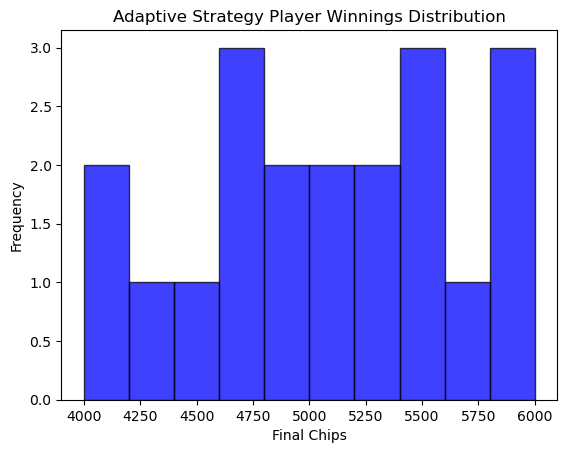

Average Winnings: 4990.0
Standard Deviation: 581.2916651733448
Probability of Winning: 1.0
Probability of Losing: 0.0


In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if not self.cards:
            self.shuffle()
            self.cards = self._generate_deck()
        return self.cards.pop() if self.cards else None

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        if card:
            self.cards.append(card)
    
    def get_value(self):
        value = sum(10 if card.rank in 'JQK' else 11 if card.rank == 'A' else int(card.rank) for card in self.cards)
        aces = sum(1 for card in self.cards if card.rank == 'A')
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips):
        self.name = name
        self.chips = chips
        self.hands = [Hand()]
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            card = deck.draw_card()
            if not card:
                break
            self.hands[0].add_card(card)

    def receive_winnings(self, amount):
        self.chips += amount

# The strategy increases the amount of chips as your hand increases in value.
# Getting better cards such as the letter cards (J, Q, K, and A) make you decrease how many cards you count.
class AdaptivePlayer(Player):
    def __init__(self, name, chips):
        super().__init__(name, chips)
        self.count = 0
    
    def update_count(self, card):
        if card:
            self.count += 1 if card.rank in ['2', '3', '4', '5', '6'] else -1 if card.rank in ['10', 'J', 'Q', 'K', 'A'] else 0
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 16 or (self.count > 1 and self.hands[0].get_value() < 19):
            card = deck.draw_card()
            if not card:
                break
            self.update_count(card)
            self.hands[0].add_card(card)

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=float('inf'))
    
    def play_turn(self, deck):
        while self.hands[0].get_value() < 17:
            card = deck.draw_card()
            if not card:
                break
            self.hands[0].add_card(card)

class BlackjackGame:
    def __init__(self):
        self.players = [AdaptivePlayer("Strategy Player", 1000)] + [Player(f"Player {i}", 1000) for i in range(1, 4)]
        self.dealer = Dealer()
        self.deck = Deck()
    
    def play_game(self, max_rounds=50):
        rounds = 0
        while rounds < max_rounds and self.players[0].chips > 0:
            self.deal_cards()
            self.play_round()
            self.evaluate_winners()
            rounds += 1
        return self.players[0].chips
    
    def deal_cards(self):
        self.deck.shuffle()
        for player in self.players:
            player.hands[0] = Hand()
            for _ in range(2):
                card = self.deck.draw_card()
                if card:
                    if isinstance(player, AdaptivePlayer):
                        player.update_count(card)
                    player.hands[0].add_card(card)
        self.dealer.hands[0] = Hand()
        for _ in range(2):
            self.dealer.hands[0].add_card(self.deck.draw_card())
    
    def play_round(self):
        for player in self.players:
            player.play_turn(self.deck)
        self.dealer.play_turn(self.deck)
    
    def evaluate_winners(self):
        dealer_value = self.dealer.hands[0].get_value()
        for player in self.players:
            player_value = player.hands[0].get_value()
            if player_value <= 21 and (dealer_value > 21 or player_value > dealer_value):
                player.receive_winnings(200)

# Run simulation
winnings = []
num_games = 20

for _ in range(num_games):
    game = BlackjackGame()
    winnings.append(game.play_game())

# Compute statistics
average_winnings = np.mean(winnings)
std_dev_winnings = np.std(winnings)
prob_win = sum(1 for w in winnings if w > 1000) / num_games
prob_loss = sum(1 for w in winnings if w < 1000) / num_games

# Plot results
plt.hist(winnings, bins=10, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel("Final Chips")
plt.ylabel("Frequency")
plt.title("Adaptive Strategy Player Winnings Distribution")
plt.show()

# Print results
print(f"Average Winnings: {average_winnings}")
print(f"Standard Deviation: {std_dev_winnings}")
print(f"Probability of Winning: {prob_win}")
print(f"Probability of Losing: {prob_loss}")